In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('train_ctrUa4K.csv')
test=pd.read_csv('test_lAUu6dG.csv')

In [3]:
train_original=train.copy()
test_original=test.copy()

In [4]:
train_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_original.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train.shape

(614, 13)

In [10]:
test.shape

(367, 12)

In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

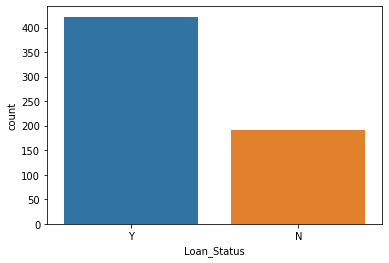

In [12]:
sns.countplot(x='Loan_Status',data=train)

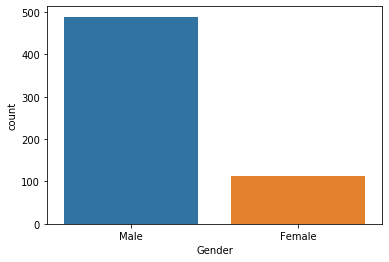

In [13]:
sns.countplot(x='Gender',data=train)

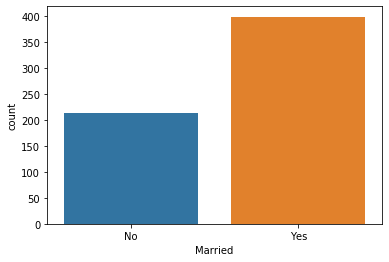

In [14]:
sns.countplot(x='Married',data=train)

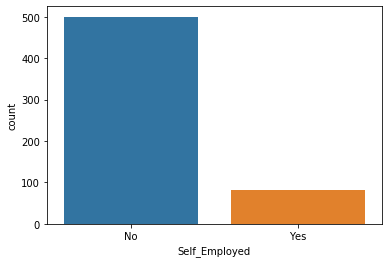

In [15]:
sns.countplot(x='Self_Employed',data=train)

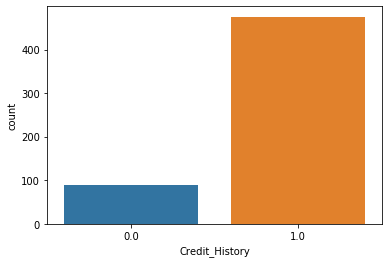

In [16]:
sns.countplot(x='Credit_History',data=train)

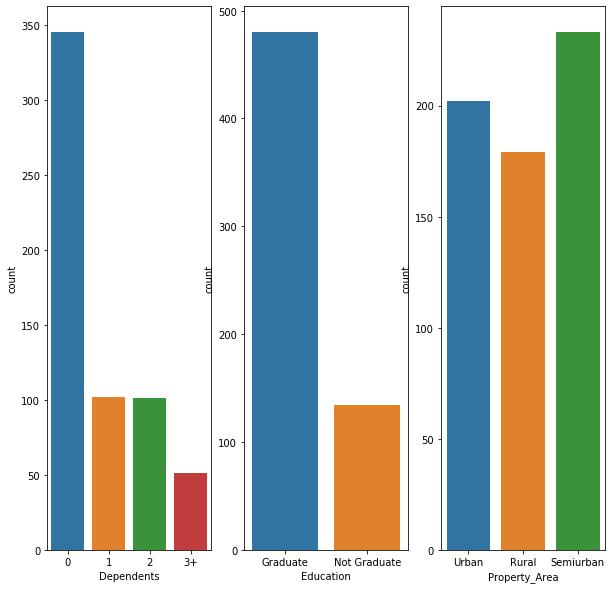

In [17]:
plt.figure(figsize=(10, 10))

# subplot 1: Dependents
plt.subplot(1, 3, 1)
sns.countplot(x='Dependents',data=train)

# subplot 2:Education 
plt.subplot(1, 3, 2)
sns.countplot(x='Education',data=train)

#subplot 3:Property_Area
plt.subplot(1,3,3)
sns.countplot(x='Property_Area',data=train)

plt.show()


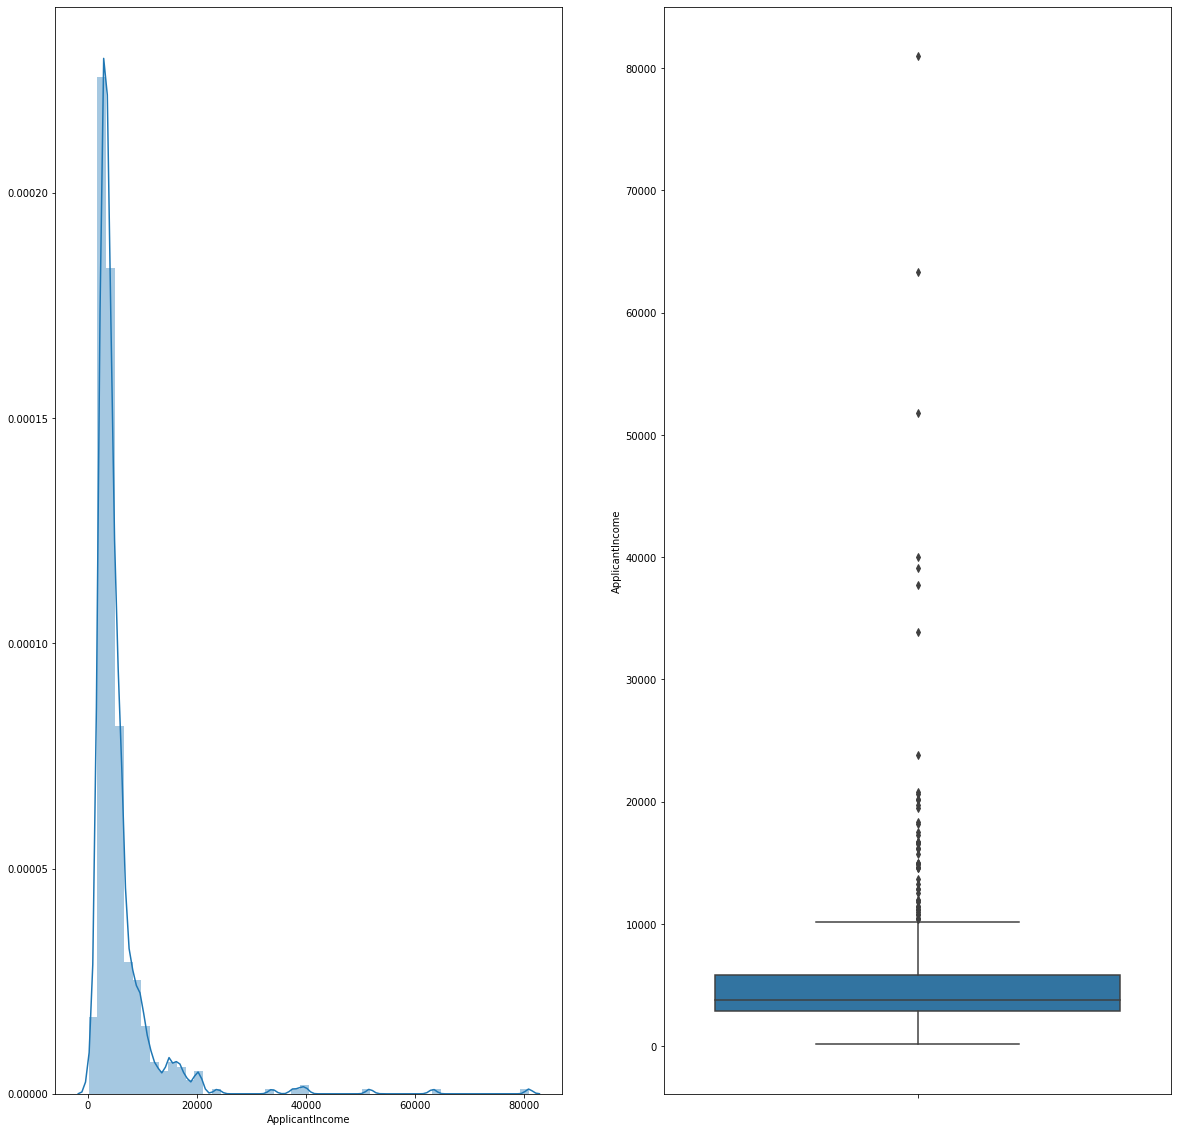

In [18]:
plt.figure(figsize=(20, 20))

# subplot 1: ApplicationIncome distplot
plt.subplot(1, 2, 1)
sns.distplot(train['ApplicantIncome'])


# subplot 2: ApplicationIncome boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y='ApplicantIncome', data=train)


plt.show()

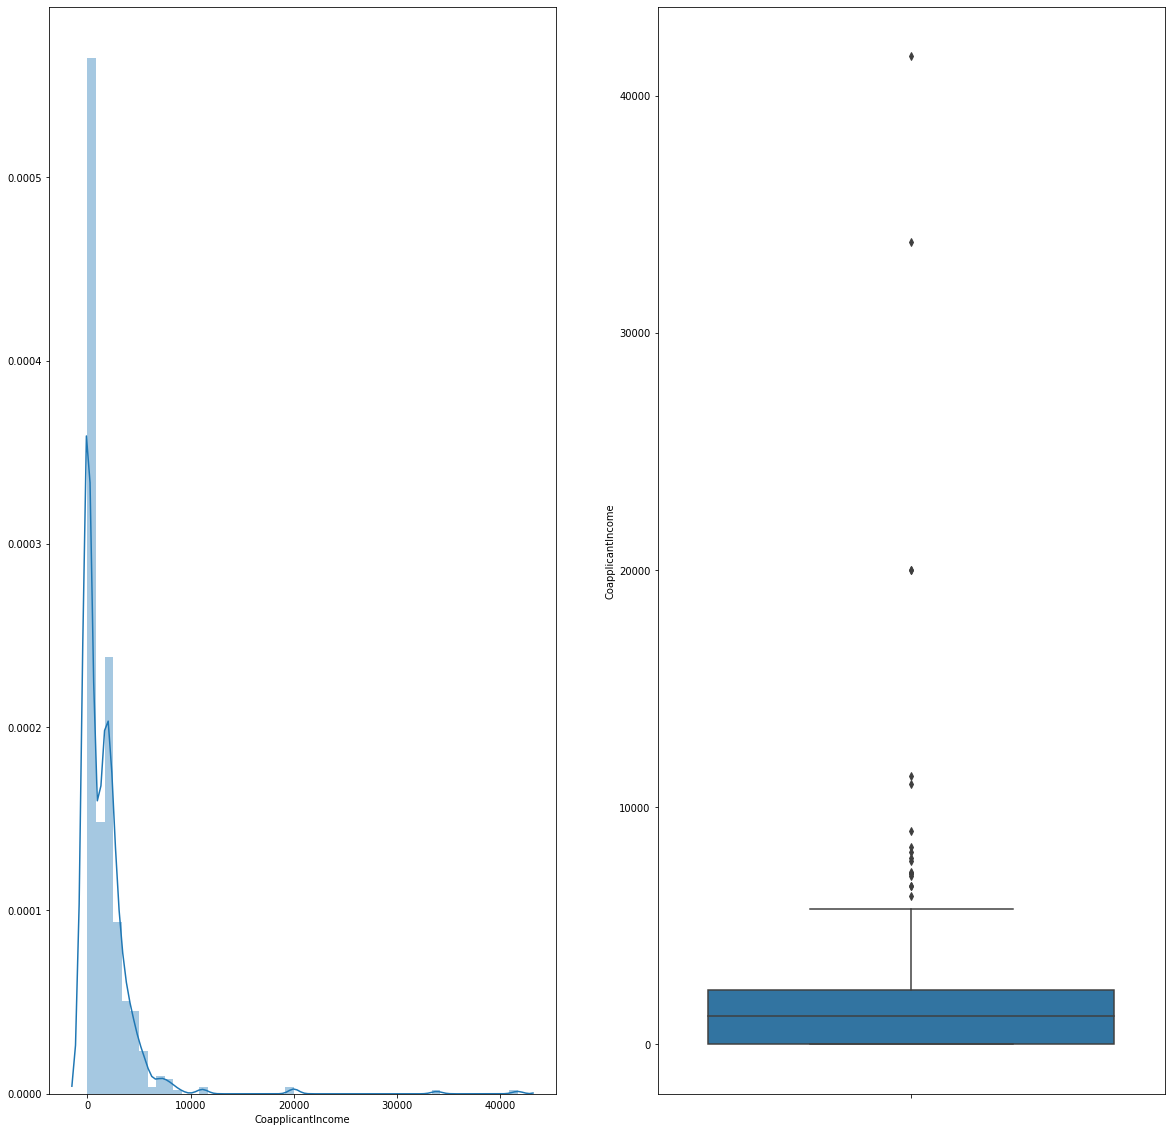

In [19]:
plt.figure(figsize=(20, 20))

# subplot 1: CoapplicationIncome distplot
plt.subplot(1, 2, 1)
sns.distplot(train['CoapplicantIncome'])


# subplot 2: CoapplicationIncome boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y='CoapplicantIncome', data=train)


plt.show()

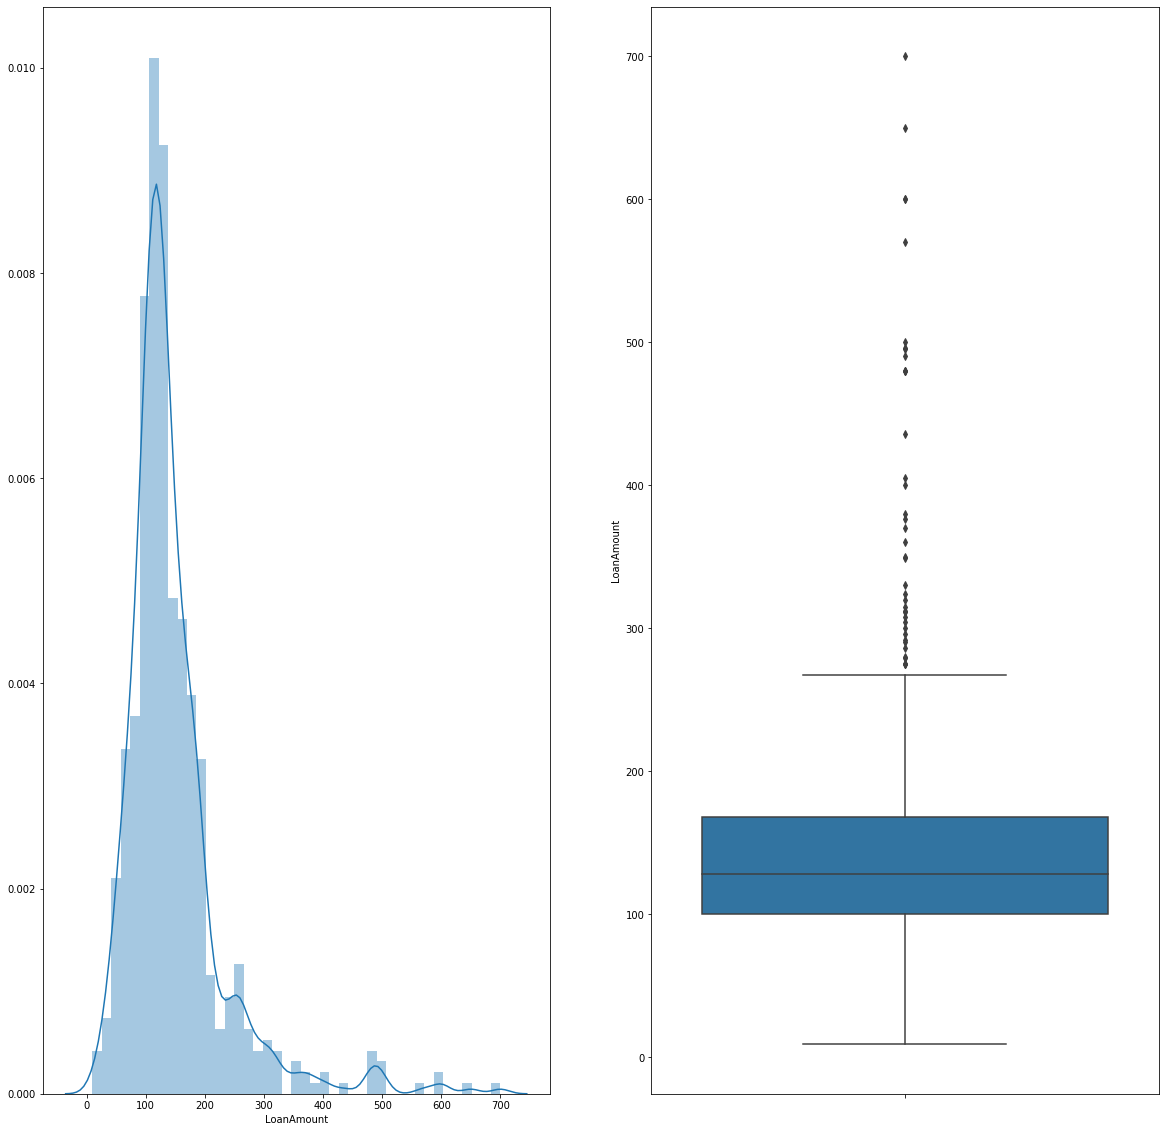

In [20]:
plt.figure(figsize=(20, 20))

# subplot 1: LoanAmount distplot
plt.subplot(1, 2, 1)
sns.distplot(train['LoanAmount'].dropna())


# subplot 2: LoanAmount boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y='LoanAmount', data=train)


plt.show()

In [21]:
gender=pd.crosstab(train['Gender'],train['Loan_Status'])

In [22]:
gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


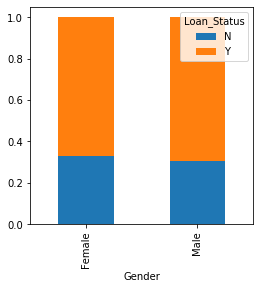

In [23]:
gender.div(gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

In [39]:
married=pd.crosstab(train['Married'],train['Loan_Status'])
dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
education=pd.crosstab(train['Education'],train['Loan_Status'])
self_employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

<Figure size 1080x720 with 0 Axes>

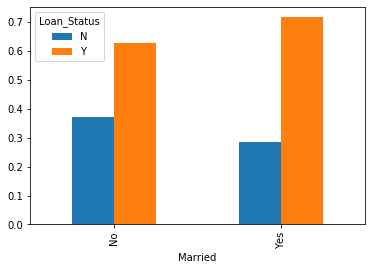

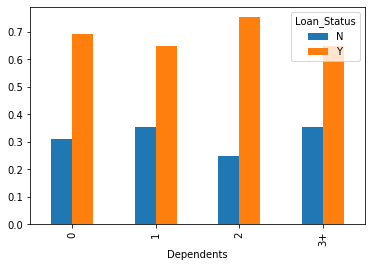

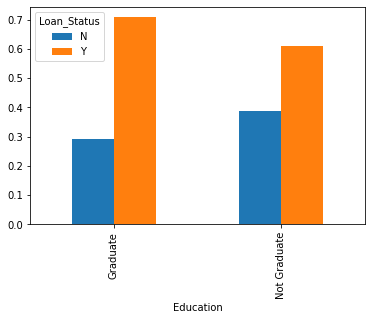

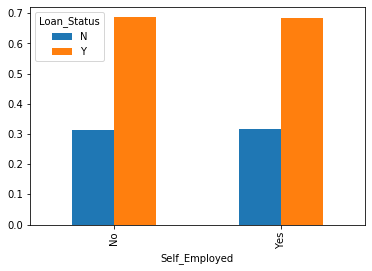

In [48]:
plt.figure(figsize=(15,10))

married.div(married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=False)

dependents.div(dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=False)

education.div(education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=False)

self_employed.div(self_employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=False)

In [49]:
credit_history=pd.crosstab(train['Credit_History'],train['Loan_Status'])
property_area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

<Figure size 1080x720 with 0 Axes>

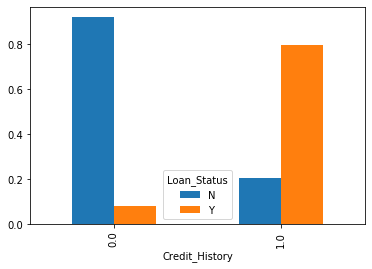

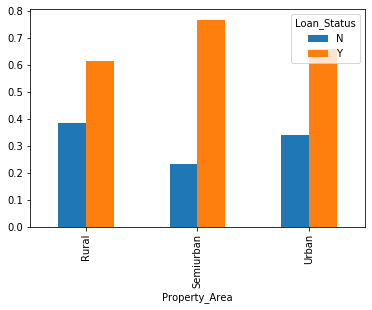

In [50]:
plt.figure(figsize=(15,10))

credit_history.div(credit_history.sum(1).astype(float),axis=0).plot(kind="bar",stacked=False)

property_area.div(property_area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=False)

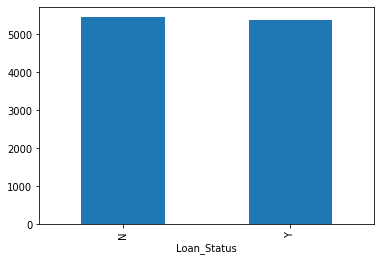

In [70]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind='bar')

In [87]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','VeryHigh']
train['Incomebin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Text(0, 0.5, 'Percentage')

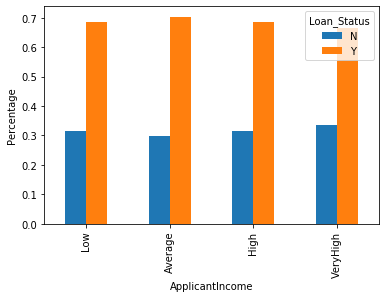

In [88]:
income=pd.crosstab(train['Incomebin'],train['Loan_Status'])
income.div(income.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

In [82]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['CoapplicantIncomebin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Text(0, 0.5, 'Percentage')

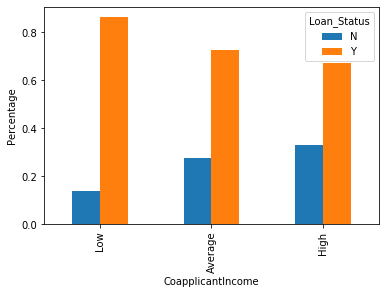

In [85]:
coapplicantincome=pd.crosstab(train['CoapplicantIncomebin'],train['Loan_Status'])
coapplicantincome.div(coapplicantincome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

In [89]:
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','VeryHigh']
train['TotalIncomebin']=pd.cut(train['TotalIncome'],bins,labels=group)

Text(0, 0.5, 'Percentage')

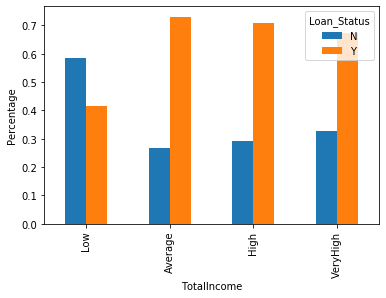

In [91]:
totalincome=pd.crosstab(train['TotalIncomebin'],train['Loan_Status'])
totalincome.div(totalincome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False)
plt.xlabel('TotalIncome')
plt.ylabel('Percentage')

In [92]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmountbin']=pd.cut(train['LoanAmount'],bins,labels=group)

Text(0, 0.5, 'Percentage')

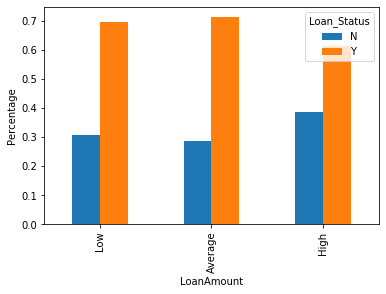

In [93]:
loanamount=pd.crosstab(train['LoanAmountbin'],train['Loan_Status'])
loanamount.div(loanamount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [96]:
train.drop(['Incomebin','CoapplicantIncomebin','TotalIncome','LoanAmountbin',],axis=1,inplace=True)

In [98]:
train.drop('TotalIncomebin',axis=1,inplace=True)

In [99]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [105]:
train['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

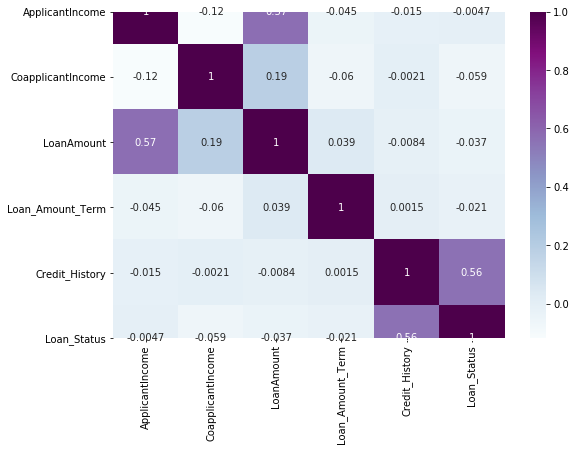

In [109]:
plt.figure(figsize=(9,6))

sns.heatmap(train.corr(),annot=True,cmap="BuPu",square=True)
plt.show()

In [110]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [111]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [113]:
train['Gender'].fillna(train.Gender.mode()[0],inplace=True)
train['Married'].fillna(train.Married.mode()[0],inplace=True)
train['Dependents'].fillna(train.Dependents.mode()[0],inplace=True)
train['Self_Employed'].fillna(train.Self_Employed.mode()[0],inplace=True)

In [117]:
train['Credit_History'].fillna(train.Credit_History.mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train.Loan_Amount_Term.mode()[0],inplace=True)

In [119]:
train['LoanAmount'].fillna(train.LoanAmount.median(),inplace=True)

In [120]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [121]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [122]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [123]:
test['Gender'].fillna(test.Gender.mode()[0],inplace=True)
test['Married'].fillna(test.Married.mode()[0],inplace=True)
test['Dependents'].fillna(test.Dependents.mode()[0],inplace=True)
test['Self_Employed'].fillna(test.Self_Employed.mode()[0],inplace=True)
test['Credit_History'].fillna(test.Credit_History.mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test.Loan_Amount_Term.mode()[0],inplace=True)
test['LoanAmount'].fillna(test.LoanAmount.median(),inplace=True)

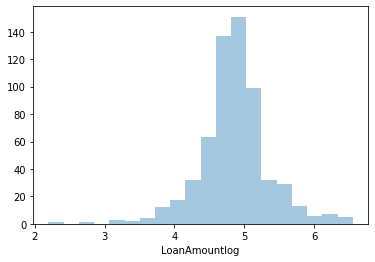

In [126]:
train['LoanAmountlog']=np.log(train['LoanAmount'])
sns.distplot(train['LoanAmountlog'],bins=20,kde=False)

In [127]:
test['LoanAmountlog']=np.log(test['LoanAmount'])

In [169]:
X=train.drop('Loan_Status',axis=1)
Y=train.Loan_Status

In [170]:
X=pd.get_dummies(X)

In [173]:
from sklearn.model_selection import train_test_split
X_train,x_cv,Y_train,y_cv=train_test_split(X,Y,test_size=0.3)

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [175]:
model= LogisticRegression(solver='liblinear',random_state=1,n_jobs=1,multi_class='ovr')
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [176]:
pred_cv=model.predict(x_cv)

In [177]:
accuracy_score(y_cv,pred_cv)

0.8162162162162162

In [178]:
y_pred=model.predict(test)

In [179]:
submission=pd.read_csv('sample_submission_49d68Cx.csv')

In [180]:
submission['Loan_Status']=y_pred
submission['Loan_ID']=test_original['Loan_ID']

In [183]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [185]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('predictions1.csv')